<a href="https://colab.research.google.com/github/pranay-pherwani/CellGrowth/blob/main/CellGrowth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy import integrate
from mpl_toolkits import mplot3d
import random
import csv
import pandas as pd
import scipy.stats as stats
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.integrate as integrate
from matplotlib.animation import FuncAnimation
!pip install pynverse
from pynverse import inversefunc
%matplotlib notebook

  Created wheel for pynverse: filename=pynverse-0.1.4.4-py3-none-any.whl size=6363 sha256=ee875c8f8329ead46cb3f808db741f472d33bfabaf32e36180f6216c8cf6142c
  Stored in directory: /root/.cache/pip/wheels/06/eb/74/006b76fdd8229ed3767fef546c825c2924f1def2d023929d9d
Successfully built pynverse


In [2]:
%matplotlib inline
plt.close('all')

In [3]:
# SET BETA
beta = 0.5
Lambda = 1

def thetaFunction(th):
  if th<=1/2:
    return 1/(np.sqrt(th))
  else:
    return thetaFunction(1-th)

def CDF(x):
  result = integrate.quad(lambda th: thetaFunction(th), 0, x)
  return result[0]
  

def genThetas(n):
    # SET 'a' HERE
    a = 0
    # # SET 'c' HERE
    # c = 1/2
    # thetas = stats.uniform(a,1-a).rvs(size=n).tolist()
    # # In the paper they start from theta_1,
    # # so I added a 0 to align the indices
    # if c!=1:
    #   for i in range(len(thetas)):
    #     thetas[i] = inverseCDF(thetas[i],c)
    uniform = True
    thetas = stats.uniform(a,1-a).rvs(size=n).tolist()
    if not uniform:
      for i in range(len(thetas)):
          #print(thetas[i])
          thetas[i] = inverseCDF(thetas[i])
          #print(thetas[i])
          #print("___")

    thetas.insert(0,0)
    
    return thetas

def inverseCDF(u):
    # if p<1/2:
    #   return (c - np.sqrt(c**2 - 8*c*p + 8*p))/(4*(c - 1))
    # else:
    #   return (-np.sqrt(c**2 + 8*c*(p - 1) - 8*p + 8) - 3*c + 4)/(4 - 4*c)
    cdf = (lambda x: CDF(x))
    invcdf = inversefunc(cdf)
    result = invcdf(u)
    if result<0:
      result=-result
    elif result>1:
      result = 2 - result
    
    if abs(CDF(result)-u)>0.001:
      print("Error calculating inverse")

    return result


def genTaus(n):
    taus = stats.expon(scale=2*beta).rvs(size=n).tolist()
    #taus.append(numpy.random.exponential(scale=2*beta,size=))
    # In the paper they start from tau_1,
    # so I added a 0 to align the indices
    taus.insert(0,0)
    return taus

def genGamma(n):
  return np.random.gamma(n,scale=2*beta)

def growthFunction(m0,t):
    v = 1
    #return (m0 + t**k)
    k = 2
    #return m0*np.exp(t)
    #return m0+(t**k)
    #return m0+np.log(t+1)
    #return m0*np.exp(t)
    #return m0*np.exp(t)+t
    return m0*(1+t) + t**2
    #return m0*np.exp(2*t)+t
    #return m0 + np.exp(t) -1
    


print(CDF(2-1.4743416492424617))
print(inverseCDF(0.55))
    





1.4509778246794565
-0.6180339603380443


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pynverse/inverse.py:188: RuntimeWarning: Trouble calculating inverse for values: [0.55]
  "%s" % str(yin[~resultsmask]), RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pynverse/inverse.py:196: RuntimeWarning: Results obtained with less th

Final mass:
0.9425278901648028


Text(0, 0.5, 'Mass')

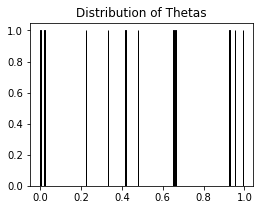

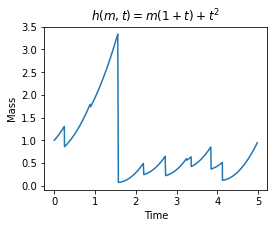

In [4]:
m0 = 1
n = 10

def simulate(n,m0):
    times = []
    times.append(0)
    mass = []
    mass.append(m0)
    
    theta = genThetas(n)
    fig, dx = plt.subplots(figsize=(4,3), sharex=False)
    plt.hist(theta, color = 'blue', edgecolor = 'black',bins = 500);
    plt.title("Distribution of Thetas")
    # We use n+1 to add the extra f(tau)
    tau = genTaus(n+1)
#     print(theta)
    # print(tau)
    # print(genGamma(n))
    T = []
    for i in range(n+2):
        T.append(sum(tau[:i+1]))
    
    for i in range(n):
        t = np.linspace(T[i],T[i+1],num=50)
        m_i = mass[-1]
        
        for j in range(1,len(t)):
            mass.append(growthFunction(m_i,t[j]-t[0]))
            times.append(t[j])
        mass[-1] = mass[-1]*theta[i+1]

    # Add f(tau)
    t = np.linspace(T[-2],T[-1],num=50)
    m_i = mass[-1]
        
    for j in range(1,len(t)):
        mass.append(growthFunction(m_i,t[j]-t[0]))
        times.append(t[j])
        
    return (times,mass)

times,mass = simulate(n,m0)

fig, ax = plt.subplots(figsize=(4,3), sharex=False)
ax.plot(times,mass)
print("Final mass:")
print(mass[-1])
ax.set_xlabel('Time')
plt.title(r"$h(m,t)=m(1+t)+t^2$")
ax.set_ylabel('Mass')

Text(0, 0.5, 'density')

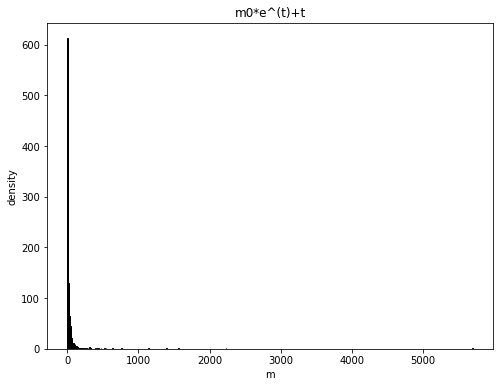

In [5]:
trials = 1000
n= 1000
m0 = 1

def distribution(n,m0,trials):
    masses = []
    thetaList = genThetas(n*trials)
    tauList = genTaus((n+1)*trials)
    for j in range(trials):
        mass = m0
        theta = thetaList[j*n:j*n+n]
        tau = tauList[j*(n+1):j*(n+1)+(n+1)]
    #     print(theta)
    #     print(tau)

        for i in range(1,n):
            mass = growthFunction(mass,tau[i])
            mass = mass*theta[i]

        mass = growthFunction(mass,tau[-1])

        masses.append(mass)
    return masses

def distributionShortcut(n,m0,trials):
    masses = []
    for j in range(trials):
        mass = m0
        theta = genThetas(n)
        T_n = genGamma(n)
        mass = mass*np.exp(Lambda*T_n)

        for i in range(1,n):
            mass = mass*theta[i]

        masses.append(mass)
    #print(masses)
    return masses
        
mass = distribution(n,m0,trials)
fig, bx = plt.subplots(figsize=(8,6), sharex=False)
plt.hist(mass, color = 'blue', edgecolor = 'black',bins = 500);
plt.title("m0*e^(t)+t")
plt.xlabel("m")
plt.ylabel("density")

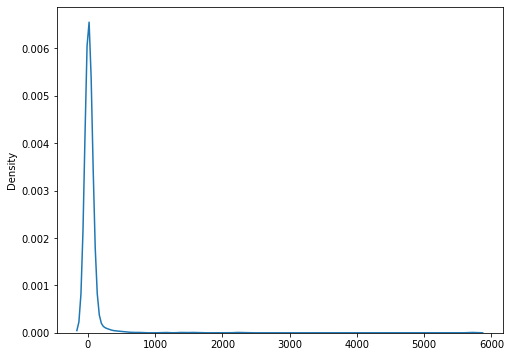

In [6]:
fig, fx = plt.subplots(figsize=(8,6), sharex=False)
sns.kdeplot(mass)


In [7]:
stats.describe(mass)

DescribeResult(nobs=1000, minmax=(0.012087532830808125, 5706.944991287167), mean=38.04069447717798, variance=46438.56130321517, skewness=20.15750545706981, kurtosis=492.6733374504755)

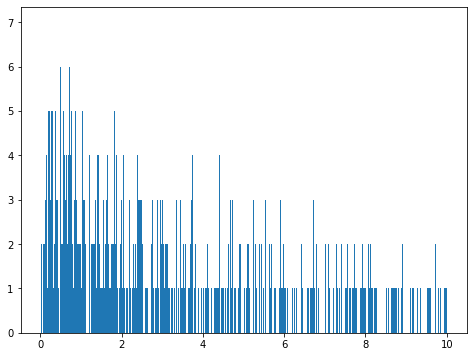

In [8]:
fig, cx = plt.subplots(figsize=(8,6), sharex=False)
plt.hist([x for x in mass if 0 <= x <= 10 ], bins=500);

Text(0.5, 0, 'log(mass)')

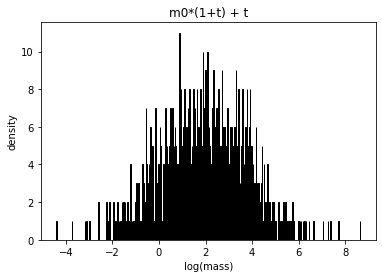

In [9]:
plt.hist(np.log(mass), color = 'blue', edgecolor = 'black',bins = 500);
plt.ylabel("density")
plt.title("m0*(1+t) + t")
plt.xlabel("log(mass)")

In [10]:
stats.describe(np.log(mass))

DescribeResult(nobs=1000, minmax=(-4.415580702110601, 8.64943913167602), mean=1.912647881304254, variance=3.231067876362308, skewness=0.0038032716568781157, kurtosis=0.13167967823392468)

In [11]:
### Sines Overlayed

def growthFunctionP(m0,t,k):
    #return m0+t**k
    if k==-1:
      return m0+random.uniform(0,2)
    else:
      return m0 + 1 + np.sin(k*t-np.pi/2)

trials = 1000
n= 100
m0 = 1

def distribution(n,m0,trials,k):
    masses = []
    thetaList = genThetas(n*trials)
    tauList = genTaus((n+1)*trials)
    for j in range(trials):
        mass = m0
        theta = thetaList[j*n:j*n+n]
        tau = tauList[j*(n+1):j*(n+1)+(n+1)]
    #     print(theta)
    #     print(tau)

        for i in range(1,n):
            mass = growthFunctionP(mass,tau[i],k)
            mass = mass*theta[i]

        mass = growthFunctionP(mass,tau[-1],k)

        masses.append(mass)
    return masses

mass1 = distribution(n,m0,trials,1)
mass2 = distribution(n,m0,trials,2)
mass3 = distribution(n,m0,trials,3)
mass1_2 = distribution(n,m0,trials,50)
mass1_4 = distribution(n,m0,trials,100)
mass5 = distribution(n,m0,trials,-1)




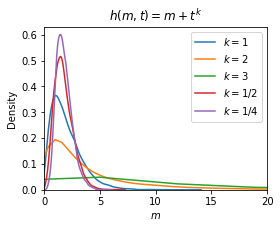

In [ ]:
fig, gx = plt.subplots(figsize=(4,3), sharex=False)
sns.kdeplot(mass1,label=r"$k=1$")
sns.kdeplot(mass2,label=r"$k=2$")
sns.kdeplot(mass3,label=r"$k=3$")
sns.kdeplot(mass1_2,label=r"$k=1/2$")
sns.kdeplot(mass1_4,label=r"$k=1/4$")
#sns.kdeplot(mass5,label="random growth",color="black")
plt.title(r"$h(m,t)=m+t^k$")
plt.xlabel(r"$m$")
plt.xlim(left=0,right=20)
plt.legend(loc='best')

In [ ]:
print("m+t")
print(stats.describe(mass1))
print("m+t^2")
print(stats.describe(mass2))
print("m+t^3")
print(stats.describe(mass3))
print("m+t^(1/2)")
print(stats.describe(mass1_2))
print("m+t^(1/4)")
print(stats.describe(mass1_4))

m+t
DescribeResult(nobs=10000, minmax=(0.006747007191544756, 12.129804737025502), mean=1.98878260733704, variance=1.9899557802869177, skewness=1.37193959196971, kurtosis=2.7816045778011924)
m+t^2
DescribeResult(nobs=10000, minmax=(0.0017682526964258216, 72.77536596820757), mean=4.017145336647775, variance=31.136799378963975, skewness=3.989201450668703, kurtosis=24.97617255951767)
m+t^3
DescribeResult(nobs=10000, minmax=(0.0005453510219392936, 1102.83560043092), mean=12.20853999997659, variance=1016.5772985463447, skewness=10.625255413126522, kurtosis=214.48823018103138)
m+t^(1/2)
DescribeResult(nobs=10000, minmax=(0.05349952741687291, 5.837777265691571), mean=1.776191809596523, variance=0.7033243994816499, skewness=0.7980012454135189, kurtosis=0.7999003918672711)
m+t^(1/4)
DescribeResult(nobs=10000, minmax=(0.20005164704935025, 6.3176269533498655), mean=1.8067135714614655, variance=0.49792456946035957, skewness=0.9026633910077101, kurtosis=1.3494468288290653)


In [ ]:
### Same multiplicative different additive

### Polynomials Overlayed

def growthFunctionM(m0,t,k):
    return m0*(1+t)+t**k
    #return m0*((1+t)**(k-1))+((1+t**3))

trials = 1000
n= 100
m0 = 1

def distributionM(n,m0,trials,k):
    masses = []
    thetaList = genThetas(n*trials)
    tauList = genTaus((n+1)*trials)
    for j in range(trials):
        mass = m0
        theta = thetaList[j*n:j*n+n]
        tau = tauList[j*(n+1):j*(n+1)+(n+1)]
    #     print(theta)
    #     print(tau)

        for i in range(1,n):
            mass = growthFunctionM(mass,tau[i],k)
            mass = mass*theta[i]

        mass = growthFunctionM(mass,tau[-1],k)

        masses.append(mass)
    return masses

mass1 = distributionM(n,m0,trials,1)
mass2 = distributionM(n,m0,trials,2)
mass3 = distributionM(n,m0,trials,3)
mass4 = distributionM(n,m0,trials,1/4)
mass5 = distributionM(n,m0,trials,5)
mass6 = distributionM(n,m0,trials,6)
mass7 = distributionM(n,m0,trials,7)
mass8 = distributionM(n,m0,trials,8)
mass9 = distributionM(n,m0,trials,9)
mass10 = distributionM(n,m0,trials,10)


[-9.733661372310305, -9.855242636858657, -9.888008751987213, -9.785082840999785, -10.035624258083999, -9.934282229102468, -10.03714545776744, -9.965820068043335, -9.74505300245161, -10.132933459951925, -9.924759936213807, -9.726798081356266, -9.805583197230257, -10.012584752635524, -9.814333618369023, -9.884638970787533, -9.834215295891081, -9.970518749604153, -9.87525420678286, -9.747866639145645, -9.659191060311997, -9.731083880967544, -9.771472230366715, -9.76064360538289, -9.846495858557166, -9.704558501469437, -9.648683974039473, -9.920863858242686, -9.631399770379877, -9.898509459694738, -9.823191958530064, -9.920804900634597, -10.012442142489418, -9.887702496822937, -9.855476894676709, -9.880914532064024, -10.064866742059861, -9.919351016991296, -9.682447774083261, -9.636871957486665, -9.833963607740808, -9.75066286829742, -9.87950038592891, -9.727054178264021, -9.68542345478093, -9.882892803441, -9.776549941328584, -9.805486818259679, -9.92737029760613, -10.070803430854792, -9.

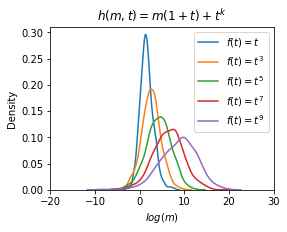

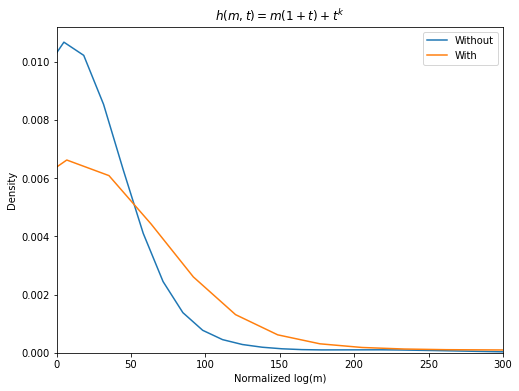

In [ ]:
fig, rx = plt.subplots(figsize=(4,3), sharex=False)
def normalized(mass):
  mu = 1
  output = []
  for i in mass:
    m = (np.log(i)-mu*n)/np.sqrt(n)
    output.append(m)
  return output
  
sns.kdeplot(np.log(mass1),label=r"$f(t)=t$")
#sns.kdeplot(np.log(mass2),label="f=t^(2)")
sns.kdeplot(np.log(mass3),label=r"$f(t)=t^3$")
#sns.kdeplot(np.log(mass4),label="f=t^(1/4)")
sns.kdeplot(np.log(mass5),label=r"$f(t)=t^5$")
#sns.kdeplot(np.log(mass6),label="f=t^6")
sns.kdeplot(np.log(mass7),label=r"$f(t)=t^7$")
#sns.kdeplot(np.log(mass8),label="f=t^8")
sns.kdeplot(np.log(mass9),label=r"$f(t)=t^9$")
#sns.kdeplot(np.log(mass10),label="f=t^10")
plt.xlabel(r"$log(m)$")
plt.title(r"$h(m,t)=m(1+t)+t^k$")
plt.xlim(left=-20,right=30)
plt.legend(loc='best')

fig, xx = plt.subplots(figsize=(8,6), sharex=False)

print(normalized(mass1))

sns.kdeplot(mass1,label="Without")
sns.kdeplot(mass2,label="With")
# sns.kdeplot(normalized(mass3),label="f=t^3")
# #sns.kdeplot(normalized(mass4),label="f=t^(1/4)")
# sns.kdeplot(normalized(mass5),label="f=t^5")
# #sns.kdeplot(normalized(mass6),label="f=t^6")
# sns.kdeplot(normalized(mass7),label="f=t^7")
# #sns.kdeplot(normalized(mass8),label="f=t^8")
# sns.kdeplot(normalized(mass9),label="f=t^9")
# #sns.kdeplot(normalized(mass10),label="f=t^10")
plt.title(r"$h(m,t)=m(1+t)+t^k$")
plt.xlabel("Normalized log(m)")
plt.xlim(left=0,right=300)
plt.legend(loc='best')

In [ ]:
print("f=t")
print(stats.describe(np.log(mass1)))
print("f=t^3")
print(stats.describe(np.log(mass3)))
print("f=t^5")
print(stats.describe(np.log(mass5)))
print("f=t^7")
print(stats.describe(np.log(mass7)))
print("f=t^9")
print(stats.describe(np.log(mass9)))

f=t
DescribeResult(nobs=10000, minmax=(-3.530519567304045, 10.775000879210669), mean=1.5937837226209286, variance=2.256863604079548, skewness=0.609913303625264, kurtosis=1.522972144286828)
f=t^3
DescribeResult(nobs=10000, minmax=(-6.55880169897717, 12.855452269139027), mean=2.517432297956461, variance=4.532024451780604, skewness=-0.06129847842989419, kurtosis=0.4620686274912651)
f=t^5
DescribeResult(nobs=10000, minmax=(-7.660190921137621, 16.982581746672313), mean=4.175412087980157, variance=7.846369762781031, skewness=-0.13129140587294724, kurtosis=0.1686096943532025)
f=t^7
DescribeResult(nobs=10000, minmax=(-7.003774911432554, 18.92206491992862), mean=6.289398889945454, variance=11.578074341836784, skewness=-0.11660249580447381, kurtosis=0.13205705682156088)
f=t^9
DescribeResult(nobs=10000, minmax=(-8.45648703482646, 24.527010771893), mean=8.488585003847884, variance=16.308581192915824, skewness=-0.015485439982343089, kurtosis=0.05960137944856747)


In [ ]:
### Same additive different multiplicative
def growthFunctionM(m0,t,k):
    # return m0*np.exp(Lambda*t)
    return m0*(1+t**k)+t

trials = 1000
n= 100
m0 = 1

def distributionM(n,m0,trials,k):
    masses = []
    thetaList = genThetas(n*trials)
    tauList = genTaus((n+1)*trials)
    for j in range(trials):
        mass = m0
        theta = thetaList[j*n:j*n+n]
        tau = tauList[j*(n+1):j*(n+1)+(n+1)]
    #     print(theta)
    #     print(tau)

        for i in range(1,n):
            mass = growthFunctionM(mass,tau[i],k)
            mass = mass*theta[i]

        mass = growthFunctionM(mass,tau[-1],k)

        masses.append(mass)
    return masses

mass1 = distributionM(n,m0,trials,1)
mass2 = distributionM(n,m0,trials,2)
mass3 = distributionM(n,m0,trials,3)
mass4 = distributionM(n,m0,trials,4)
mass5 = distributionM(n,m0,trials,5)
mass6 = distributionM(n,m0,trials,6)
mass7 = distributionM(n,m0,trials,7)
mass8 = distributionM(n,m0,trials,8)
mass9 = distributionM(n,m0,trials,9)
mass10 = distributionM(n,m0,trials,10)

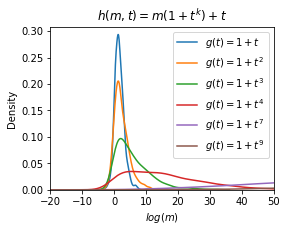

In [ ]:
fig, ux = plt.subplots(figsize=(4,3), sharex=False)
sns.kdeplot(np.log(mass1),label=r"$g(t)=1+t$")
sns.kdeplot(np.log(mass2),label=r"$g(t)=1+t^2$")
sns.kdeplot(np.log(mass3),label=r"$g(t)=1+t^3$")
sns.kdeplot(np.log(mass4),label=r"$g(t)=1+t^4$")
#sns.kdeplot(np.log(mass5),label="f=t^5")
#sns.kdeplot(np.log(mass6),label="f=t^6")
sns.kdeplot(np.log(mass7),label=r"$g(t)=1+t^7$")
#sns.kdeplot(np.log(mass8),label="f=t^8")
sns.kdeplot(np.log(mass9),label=r"$g(t)=1+t^9$")
#sns.kdeplot(np.log(mass10),label="f=t^10")
plt.title(r"$h(m,t)=m(1+t^k)+t$")
plt.xlabel(r"$log(m)$")
plt.xlim(left=-20,right=50)
plt.legend(loc='best')

In [ ]:
print("g=t")
print(stats.describe(np.log(mass1)))
print("g=t^2")
print(stats.describe(np.log(mass2)))
print("g=t^3")
print(stats.describe(np.log(mass3)))
print("g=t^4")
print(stats.describe(np.log(mass4)))
print("g=t^5")
print(stats.describe(np.log(mass5)))

g=t
DescribeResult(nobs=10000, minmax=(-5.421973374864516, 10.015717985087203), mean=1.5621076275910106, variance=2.2324444446036598, skewness=0.6180340066868294, kurtosis=1.5203997074748532)
g=t^2
DescribeResult(nobs=10000, minmax=(-5.0537724853311925, 22.969203473683812), mean=2.4813450552123233, variance=6.947500582521243, skewness=1.5998113197513038, kurtosis=4.56960943363525)
g=t^3
DescribeResult(nobs=10000, minmax=(-3.697675823248802, 70.68131436900615), mean=6.876742415344613, variance=52.204359279366784, skewness=1.9825472505939592, kurtosis=6.0206655816703325)
g=t^4
DescribeResult(nobs=10000, minmax=(-2.2201226446239013, 237.9566186592732), mean=56.11604996048898, variance=1546.4331827743238, skewness=0.8060290163150324, kurtosis=0.3773085409304544)
g=t^5
DescribeResult(nobs=10000, minmax=(2.721018852636465, 489.4842956356773), mean=224.3729071214106, variance=4239.637681367979, skewness=0.057135134407701925, kurtosis=-0.04549961473269715)


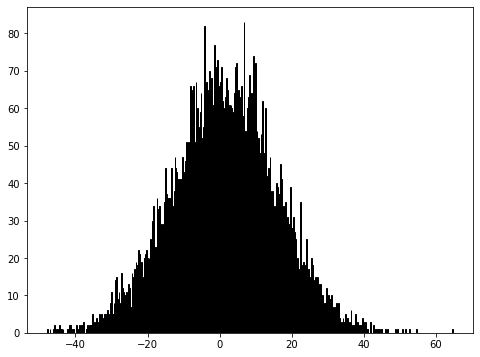

In [ ]:
trials = 10000
n= 100
m0 = 1


def logDistribution(n,m0,trials):
    masses = []
    for j in range(trials):
        logMass = 0
        theta = genThetas(n)
        T_n = genGamma(n)
        logMass = logMass + Lambda*T_n

        for i in range(1,n):
            logMass = logMass+np.log(theta[i])

        masses.append(logMass)
    #print(masses)
    return masses
        
mass = logDistribution(n,m0,trials)
fig, bx = plt.subplots(figsize=(8,6), sharex=False)
plt.hist(mass, color = 'blue', edgecolor = 'black',bins = 500);

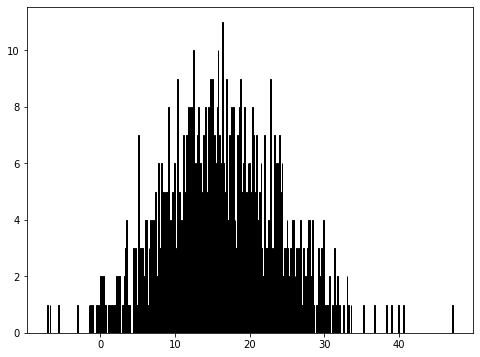

In [ ]:
# Polynomial Growth

trials = 1000
n= 100
m0 = 1
k = 1


def logDistribution(n,m0,trials):
    masses = []
    for j in range(trials):
        mass = m0
        theta = genThetas(n)
        tau = genTaus(n)
    #     print(theta)
    #     print(tau)

        for i in range(1,n):
            mass = growthFunction(mass,tau[i])
            mass = mass*theta[i]

        masses.append(np.log(mass))
    return masses
        
mass = logDistribution(n,m0,trials)
fig, bx = plt.subplots(figsize=(8,6), sharex=False)
plt.hist(mass, color = 'blue', edgecolor = 'black',bins = 500);